<a href="https://colab.research.google.com/github/Ssobol17/Compare-two-CSV-files/blob/master/stkanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Description: This is a python program for cryptocurrency analysis


In [6]:
#Import the libraries
import numpy as np
import pandas as pd

In [10]:
#load data 
from google.colab import files
uploaded = files.upload ()

Saving BTC_USD_2020-01-30_2021-01-29-CoinDesk.csv to BTC_USD_2020-01-30_2021-01-29-CoinDesk.csv
Saving ETH_USD_2020-01-30_2021-01-29-CoinDesk.csv to ETH_USD_2020-01-30_2021-01-29-CoinDesk.csv
Saving LTC_USD_2020-01-30_2021-01-29-CoinDesk.csv to LTC_USD_2020-01-30_2021-01-29-CoinDesk.csv


In [12]:
# store data in data frames
df_btc = pd.read_csv('BTC_USD_2020-01-30_2021-01-29-CoinDesk.csv')
df_eth = pd.read_csv('ETH_USD_2020-01-30_2021-01-29-CoinDesk.csv')
df_ltc = pd.read_csv('LTC_USD_2020-01-30_2021-01-29-CoinDesk.csv')

In [13]:
# print data
df_btc.head()


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-01-30,9545.077957,9288.522646,9633.251035,9185.181340
1,BTC,2020-01-31,9388.880752,9548.545376,9558.432613,9198.659041
2,BTC,2020-02-01,9363.193383,9388.879070,9451.064580,9284.410559
3,BTC,2020-02-02,9385.260386,9375.226831,9465.487907,9150.534573
4,BTC,2020-02-03,9269.707035,9385.259769,9603.105582,9222.946494


In [14]:
df_eth.head()


,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,ETH,2020-01-30,186.262041,173.560385,186.312340,170.547995
1,ETH,2020-01-31,181.728434,186.328560,186.611102,175.029198
2,ETH,2020-02-01,182.773989,181.728338,184.033278,179.014594
3,ETH,2020-02-02,189.312553,183.482321,193.291100,178.985995
4,ETH,2020-02-03,189.257593,189.313416,195.089720,186.560349


In [15]:
df_ltc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,LTC,2020-01-30,68.948899,59.708320,70.085969,58.166721
1,LTC,2020-01-31,68.403032,68.979720,69.822341,65.359336
2,LTC,2020-02-01,70.502098,68.385620,72.827961,67.444779
3,LTC,2020-02-02,70.836944,70.760755,73.377210,67.680673
4,LTC,2020-02-03,69.528733,70.836867,72.882658,68.397756


In [16]:
df=pd.DataFrame({'BTC': df_btc['Closing Price (USD)'],
                 'ETH': df_eth['Closing Price (USD)'],
                 'LTC': df_ltc['Closing Price (USD)'],

})

In [17]:
df

,BTC,ETH,LTC
0,9545.077957,186.262041,68.948899
1,9388.880752,181.728434,68.403032
2,9363.193383,182.773989,70.502098
3,9385.260386,189.312553,70.836944
4,9269.707035,189.257593,69.528733
...,...,...,...
361,32500.255963,1324.858487,138.150795
362,32324.555651,1350.736956,133.734859
363,30534.999373,1247.656556,124.291012
364,33408.218337,1354.960394,133.997601


In [18]:
df.describe()

,BTC,ETH,LTC
count,366.000000,366.000000,366.000000
mean,13225.179106,389.806166,63.743939
std,7650.738658,276.146725,30.523943
min,4944.702336,107.898345,32.053195
25%,9188.613915,220.728413,44.312410
50%,10327.042282,329.358261,50.548916
75%,13618.701288,431.100174,71.973660
max,40519.448598,1411.833939,175.567832


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f6e1809a908> has a label of '_' which cannot be automatically added to the legend.
  


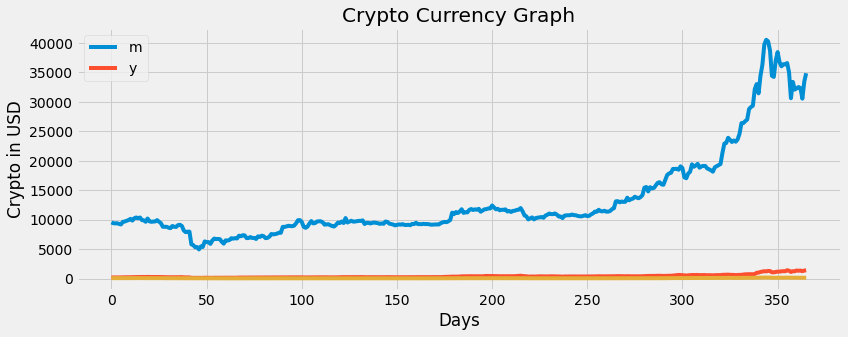

In [19]:
#visual display data set

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

my_crypto= df
plt.figure(figsize=(12.2,4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto [c], label = c)

plt.title('Crypto Currency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto in USD')
plt.legend('my_crypto.columns.values, loc= upper left')
plt.show()



In [20]:
# scale data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(df)
scaled 

array([[12.93157676,  6.00978276, 25.70866969],
       [12.49250911,  5.66209633, 25.32831389],
       [12.42030235,  5.74228086, 26.79092796],
       ...,
       [71.93388492, 87.40908796, 64.27066909],
       [80.01045402, 95.63831635, 71.03415217],
       [84.04235644, 99.68156792, 74.0280305 ]])

In [21]:
#convert scaled data tpo DF
df_scale = pd.DataFrame (scaled, columns = df.columns)

<function matplotlib.pyplot.show>

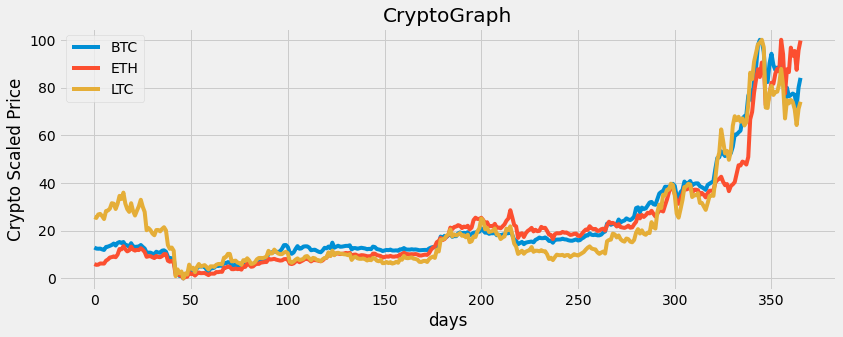

In [22]:
#visualize the scalled data 
my_crypto = df_scale
plt.figure(figsize=(12.4, 4.5))
for c in my_crypto.columns.values :
  plt.plot(my_crypto[c], label=c)

plt.title('CryptoGraph')
plt.xlabel('days')
plt.ylabel('Crypto Scaled Price')
plt.legend(my_crypto.columns.values, loc = 'upper left')
plt.show

In [23]:
DSR = df.pct_change(1)
DSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,-0.016364,-0.024340,-0.007917
2,-0.002736,0.005753,0.030687
3,0.002357,0.035774,0.004749
4,-0.012312,-0.000290,-0.018468
...,...,...,...
361,0.006645,-0.032170,-0.008682
362,-0.005406,0.019533,-0.031965
363,-0.055362,-0.076314,-0.070616
364,0.094096,0.086004,0.078096


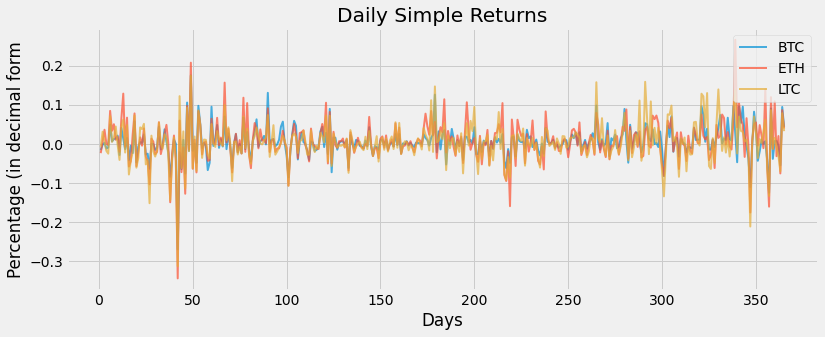

In [24]:
plt.figure(figsize=(12, 4.5))
for c in DSR.columns.values:
   plt.plot(DSR.index, DSR[c], label = c, lw = 2, alpha = .7)
plt.title('Daily Simple Returns')
plt.ylabel('Percentage (in decimal form')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'upper right')
plt.show()

In [26]:
#get the volitlity
print('Crypto Volitlity')
DSR.std()


Crypto Volitlity


BTC    0.038004
ETH    0.052042
LTC    0.050793
dtype: float64

In [28]:
#mean average simple return
DSR.mean()

BTC    0.004287
ETH    0.006944
LTC    0.003231
dtype: float64

In [30]:
#get the coralation
DSR.corr()

,BTC,ETH,LTC
BTC,1.000000,0.787571,0.82797
ETH,0.787571,1.000000,0.82979
LTC,0.827970,0.829790,1.00000


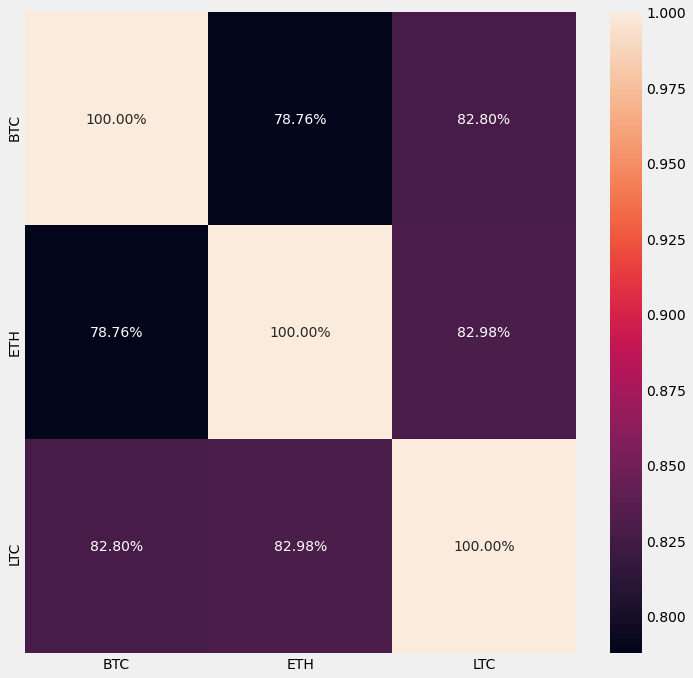

In [36]:
#visualize corr
import seaborn as sns
plt.subplots (figsize= (11,11))
sns.heatmap (DSR.corr(), annot= True, fmt= '.2%')


In [54]:
#invested 1 year ago loss profit daily variable simpe returns
DCSR = (DSR+1).cumprod()
DCSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.983636,0.975660,0.992083
2,0.980945,0.981273,1.022527
3,0.983257,1.016378,1.027383
4,0.971150,1.016082,1.008410
...,...,...,...
361,3.404923,7.112874,2.003669
362,3.386516,7.251810,1.939623
363,3.199031,6.698394,1.802654
364,3.500047,7.274485,1.943434


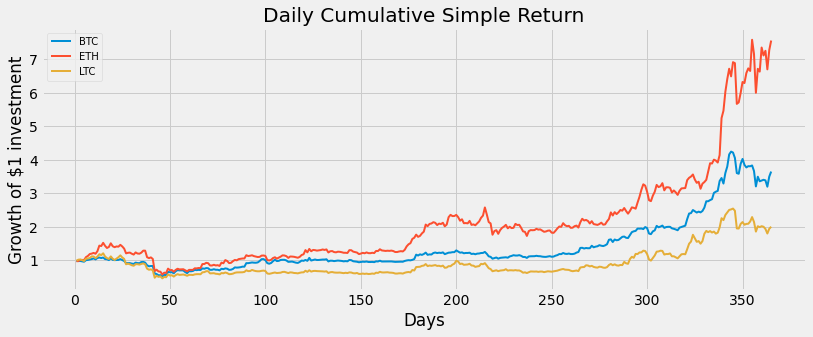

In [56]:
#visualize
plt.figure(figsize=(12.2,4.5))
for c in DCSR.columns.values:
  plt.plot(DCSR.index, DCSR[c],lw=2, label = c)

plt.title('Daily Cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment')
plt.legend(DCSR.columns.values, loc = 'upper left', fontsize = 10)
plt.show()